# 요약

* 데이터 수 300000개, 가능한 peak : 1 ~ 5
* 2개의 mean, width parameter를 생성하여 이로부터 데이터 생성
* 생성된 데이터를 Sequential 모델로 간단히 정의된 FCL에 투입.
* 결과는 좋지 않음.
* 특성 추출(Feature extraction) 과정 없이 했기 때문일지도.?
* 컨볼루션 층을 앞에 끼워넣어야 할 것으로 보인다.

In [0]:
# ========== Library import ==========

import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# ========== Generating parameters corresponding to mean position and width

N = 5  # Maximum number of possible peak
Data_numbers = 300000  # Number of dataset

# Parameters zeros array 생성
Parameters = np.zeros((Data_numbers, N, 2))
print(Parameters.shape[1])

5


In [0]:
# curve-fitting objective function : Lorentzian function

def Lorentzian(x, *args):

    a = args[::2]
    b = args[1::2]
    result = 0
    for i in range(len(a)):
        
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] ** 2 / ((x - a[i])**2 + b[i]**2)
    return result


def simple(x, a, b):
    result = b** 2 / ((x - a)**2 + b**2)
    return result


In [7]:
x = np.arange(-1, 2, 0.01)
len(x)

300

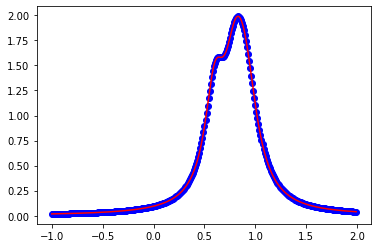

In [8]:
# ========== check generating data ==========

plt.plot(x, Lorentzian(x, *[0.6, 0.12, 0.9, 0.15, 0.8, 0.14]), color = 'red')
plt.scatter(x, simple(x, 0.6, 0.12) + simple(x, 0.9, 0.15) + simple(x, 0.8, 0.14), color='blue' )


In [9]:
# ========== generating parameters corresponding to mean and width, and save to 'Parameters' ==========

for i in range(len(Parameters)): # 각각의 행렬에 대하여

    for j in range(Parameters.shape[1]): # 각각의 행에대하여

        Parameters[i][j] = np.array([[np.random.rand(), 0.1*np.random.rand() + 0.1]])
        # 두번째 파라미터는 0.1 과 0.2 사이로 설정.

Parameters

array([[[0.49535262, 0.19813126],
        [0.59264262, 0.12932718],
        [0.16922104, 0.13767555],
        [0.27468906, 0.11782775],
        [0.30459143, 0.17971419]],

       [[0.11391748, 0.18702676],
        [0.60845811, 0.16143148],
        [0.54377535, 0.15012955],
        [0.86447137, 0.1848761 ],
        [0.09546296, 0.13843838]],

       [[0.98502553, 0.10588338],
        [0.10706798, 0.11392136],
        [0.6300686 , 0.18557532],
        [0.02460639, 0.17842349],
        [0.31250518, 0.15386884]],

       ...,

       [[0.67470934, 0.17877865],
        [0.92905532, 0.17438901],
        [0.02047104, 0.19439392],
        [0.22708631, 0.11622734],
        [0.12747095, 0.15162974]],

       [[0.72779646, 0.17563681],
        [0.05283667, 0.13896471],
        [0.85567451, 0.1959414 ],
        [0.8435685 , 0.1698173 ],
        [0.90331887, 0.167405  ]],

       [[0.61351883, 0.14004016],
        [0.30806241, 0.18027438],
        [0.94840774, 0.19415623],
        [0.05086206, 0.19

In [0]:
# ========== Data generating and dividing ==========

train_x = []
train_y = []

for j in Parameters:  # 각각의 파라미터 행렬에 대하여

    peak = random.randint(1, N) # 반복문 실행할 때마다 peak number 임의로 추출

    j = list(j.reshape((2*N,))) # j는 2차원 행렬이므로 args로 받아들이기 위해 reshape처리

    if peak == 1:
        train_x.append(Lorentzian(x, *j[0:2]))
        train_y.append(np.array([j[0], j[1] , 0, 0, 0, 0, 0, 0, 0, 0]))

    elif peak == 2:
        train_x.append(Lorentzian(x, *j[0:4]))
        train_y.append(np.array([j[0], j[1], j[2], j[3], 0, 0, 0, 0, 0, 0]))

    elif peak == 3:
        train_x.append(Lorentzian(x, *j[0:6]))
        train_y.append(np.array([j[0], j[1], j[2], j[3], j[4], j[5], 0, 0, 0, 0]))

    elif peak == 4:
        train_x.append(Lorentzian(x, *j[0:8]))
        train_y.append(np.array([j[0], j[1], j[2], j[3], j[4], j[5], j[6], j[7], 0, 0]))

    elif peak == 5:
        train_x.append(Lorentzian(x, *j[0:]))
        train_y.append(np.array([j[0], j[1], j[2], j[3], j[4], j[5], j[6], j[7], j[8], j[9]]))



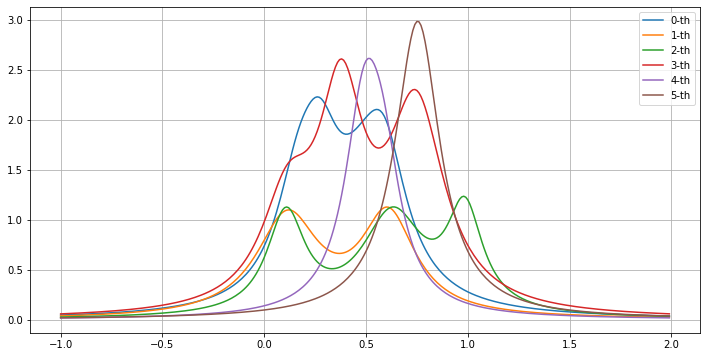

In [13]:
# ========= 생성된 데이터셋을 시각적으로 확인 =========

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.plot(x, train_x[i], label = str(i) + '-th')
    plt.legend()
    plt.grid('on')
    

[0.76198144 0.11558139 0.7551813  0.13251552 0.73747267 0.15847183
 0.         0.         0.         0.        ]


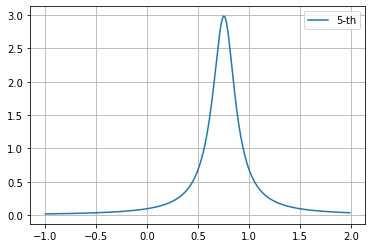

In [14]:
i = 5
plt.plot(x, train_x[i], label = str(i) + '-th')
plt.legend()
plt.grid('on')

print(train_y[i])

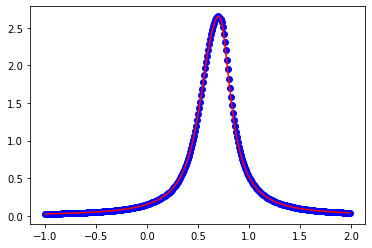

In [15]:
# 위에서 정의한 Lorentzian 함수가 의도대로 작동하는지 확인!

plt.plot(x, Lorentzian(x, *[0.73484468, 0.10028801, 0.61392187, 0.16080198, 0.67500154, 0.18557922]), color = 'red')
plt.scatter(x, simple(x,0.73484468, 0.10028801) + simple(x, 0.61392187, 0.16080198) + simple(x, 0.67500154, 0.18557922), color='blue' )


In [0]:
# Data dividing

train_data = np.array(train_x[:150000])
val_data = np.array(train_x[150000:250000])
test_data = np.array(train_x[250000:])

train_labels = np.array(train_y[:150000])
val_labels = np.array(train_y[150000:250000])
test_labels = np.array(train_y[250000:])

In [17]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(150000, 300) (150000, 10)
(100000, 300) (100000, 10)
(50000, 300) (50000, 10)


In [19]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(200, activation = 'relu', input_shape=(300, )))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(N*2, activation = 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 81,310
Trainable params: 81,310
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss = 'mse', metrics = ['mae'])

In [21]:
models = model.fit(train_data,train_labels,
                 epochs=25,
                 batch_size=2000,
                 validation_data=(val_data,val_labels))

Train on 150000 samples, validate on 100000 samples
Epoch 1/25
150000/150000 [==============================] - 2s 15us/step - loss: 0.0592 - mae: 0.1514 - val_loss: 0.0300 - val_mae: 0.1158
Epoch 2/25
150000/150000 [==============================] - 1s 4us/step - loss: 0.0279 - mae: 0.1096 - val_loss: 0.0261 - val_mae: 0.1038
Epoch 3/25
150000/150000 [==============================] - 1s 4us/step - loss: 0.0251 - mae: 0.1002 - val_loss: 0.0240 - val_mae: 0.0963
Epoch 4/25
150000/150000 [==============================] - 1s 4us/step - loss: 0.0231 - mae: 0.0927 - val_loss: 0.0222 - val_mae: 0.0896
Epoch 5/25
150000/150000 [==============================] - 1s 4us/step - loss: 0.0218 - mae: 0.0879 - val_loss: 0.0213 - val_mae: 0.0861
Epoch 6/25
150000/150000 [==============================] - 1s 4us/step - loss: 0.0209 - mae: 0.0839 - val_loss: 0.0205 - val_mae: 0.0816
Epoch 7/25
150000/150000 [==============================] - 1s 4us/step - loss: 0.0203 - mae: 0.0813 - val_loss: 0.0200

<function matplotlib.pyplot.show>

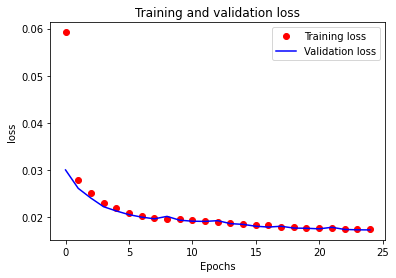

In [22]:
# Loss and val_Loss check

loss     =  models.history['loss']
val_loss =  models.history['val_loss']

epochs = range(0,len(loss))

plt.plot(epochs, loss, 'bo', label = 'Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show


In [23]:

predict = model.predict(test_data)
print(predict)

[[ 0.70326155  0.11160187  0.7139446  ... -0.00439843 -0.02903391
   0.01085917]
 [ 0.686462    0.1396891   0.6647722  ...  0.02195116 -0.0141194
  -0.00642234]
 [ 0.59345096  0.13304149  0.5512973  ...  0.15249267  0.03438565
  -0.00725287]
 ...
 [ 0.6005631   0.16561367  0.5768199  ...  0.01770733 -0.0257517
   0.0184948 ]
 [ 0.74109644  0.17210288 -0.01199172 ...  0.00767062 -0.0094492
   0.00113443]
 [ 0.6367712   0.16527434  0.61726874 ...  0.0170225  -0.03608964
   0.00276293]]


In [24]:
predict[2].shape

(10,)

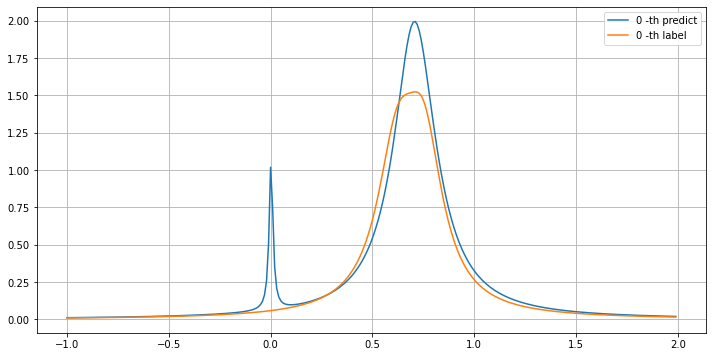

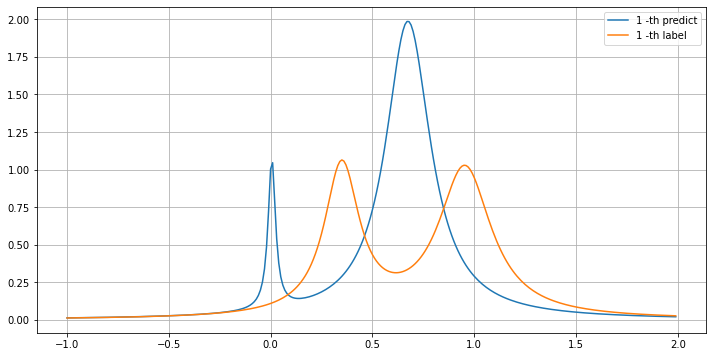

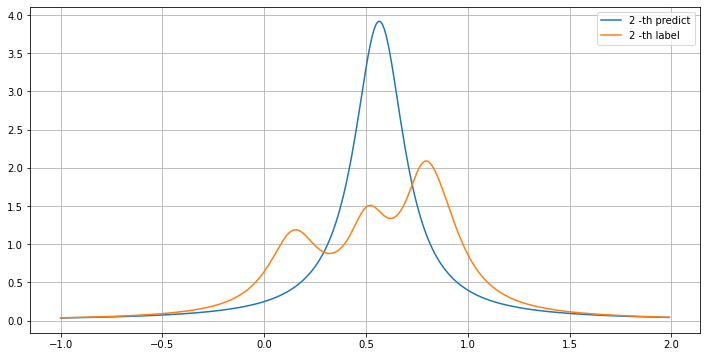

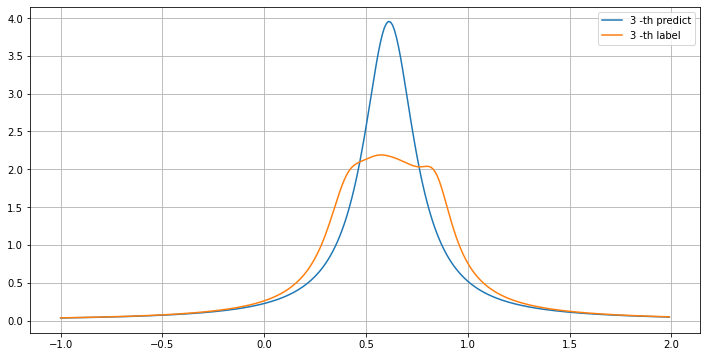

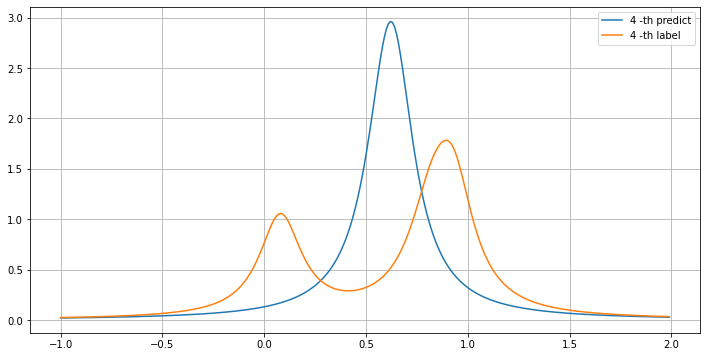

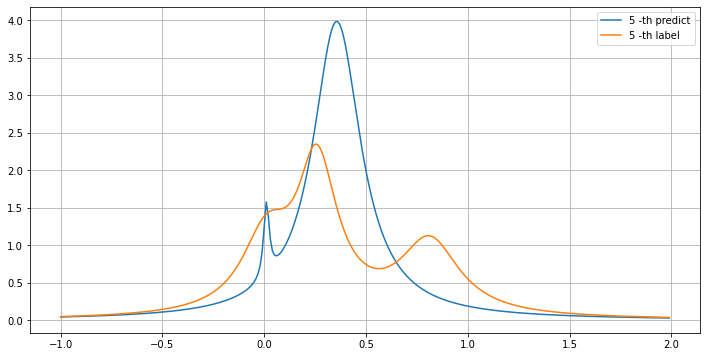

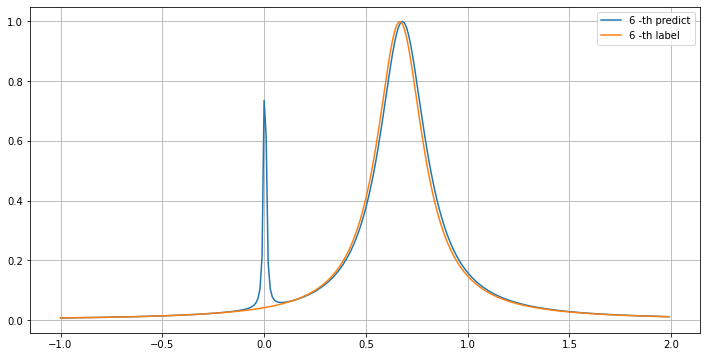

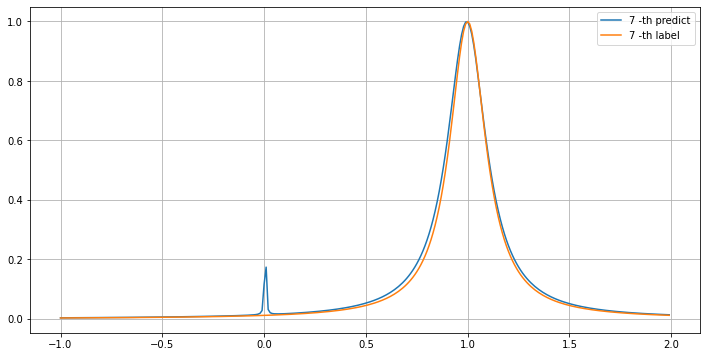

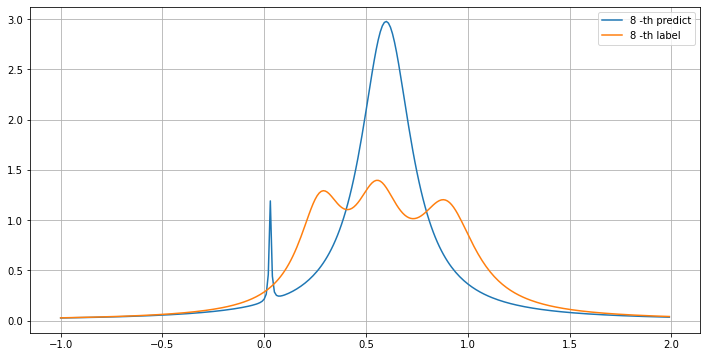

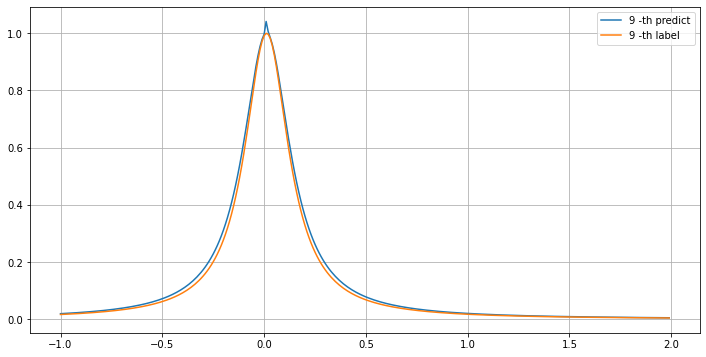

In [25]:
# test

for i in range(10):

    plt.figure(figsize=(12,6))
    plt.plot(x, Lorentzian(x, *list(predict[i])), label = str(i) + ' -th predict')
    plt.plot(x, test_data[i], label = str(i) + ' -th label')
    plt.grid('on')
    plt.legend()
    plt.show()
